# Handwritten Digits Recognition Using Keras

## Data downloading and preprocessing

In [36]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from keras import utils
from keras.preprocessing import image
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline 

**Downloading MNIST dataset**

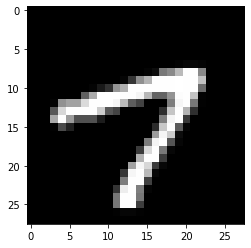

In [17]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
n = 101
plt.imshow(Image.fromarray(X_train[n]).convert('RGBA'))
plt.show()

**Converting 2D images to flat vectors**

In [18]:
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape((X_train.shape[0], num_pixels)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], num_pixels)).astype('float32')

In [19]:
print(X_train.shape[0])

60000


**Data normalization**

In [20]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

**Preparing labels**

In [21]:
print(y_train[n])

7


**Converting lables into one hot encoding format**

In [22]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [23]:
print(y_train[n])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


## Creating the neural network

**Creating a sequential model**

**Adding layers to the model**

Network architecture is from the Wikipedia - https://en.wikipedia.org/wiki/MNIST_database


In [24]:
# define baseline model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
	model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
  # Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model
  

## Training the network

In [25]:
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
300/300 - 1s - loss: 0.2778 - accuracy: 0.9213 - val_loss: 0.1391 - val_accuracy: 0.9615 - 1s/epoch - 4ms/step
Epoch 2/10
300/300 - 1s - loss: 0.1106 - accuracy: 0.9678 - val_loss: 0.0916 - val_accuracy: 0.9725 - 727ms/epoch - 2ms/step
Epoch 3/10
300/300 - 1s - loss: 0.0691 - accuracy: 0.9796 - val_loss: 0.0832 - val_accuracy: 0.9747 - 719ms/epoch - 2ms/step
Epoch 4/10
300/300 - 1s - loss: 0.0500 - accuracy: 0.9855 - val_loss: 0.0714 - val_accuracy: 0.9771 - 727ms/epoch - 2ms/step
Epoch 5/10
300/300 - 1s - loss: 0.0357 - accuracy: 0.9896 - val_loss: 0.0665 - val_accuracy: 0.9799 - 716ms/epoch - 2ms/step
Epoch 6/10
300/300 - 1s - loss: 0.0264 - accuracy: 0.9930 - val_loss: 0.0598 - val_accuracy: 0.9804 - 733ms/epoch - 2ms/step
Epoch 7/10
300/300 - 1s - loss: 0.0198 - accuracy: 0.9951 - val_loss: 0.0630 - val_accuracy: 0.9797 - 724ms/epoch - 2ms/step
Epoch 8/10
300/300 - 1s - loss: 0.0147 - accuracy: 0.9967 - val_loss: 0.0626 - val_accuracy: 0.9802 - 760ms/epoch - 3ms/step
Epo

## Saving the trained neural network

Saving the network to the file `mnist_dense.h5`

In [ ]:
model.save("mnist_dense.h5")


Cheking the file

In [ ]:
!ls 

mnist_dense.h5	sample_data


**Downloading the file to local computer**

In [ ]:
files.download("mnist_dense.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

How to use the trained model on your local computer:

```
from keras.models import load_model
model = load_model('mnist_dense.h5')
```

## Using the network to recognize handritten digits

In [26]:
n_rec = 126
# plt.imshow(Image.fromarray(X_test[n_rec]).convert('RGBA'))
# plt.show()

**Adding extra dimension to the image**

In [27]:
x = X_test[n_rec]
x = np.expand_dims(x, axis=0)

**Executing image recognition**

In [28]:
prediction = model.predict(x)

1/1 [==============================] - 0s 69ms/step


**Printing recognition results**

In [29]:
print(prediction)

[[9.9456882e-01 3.2199939e-08 7.0030321e-05 1.6642060e-06 5.1404614e-09
  3.8699578e-05 3.6180737e-07 2.8695674e-06 6.4891140e-08 5.3174342e-03]]


**Converting from one hot encoding to class number**

In [30]:
prediction = np.argmax(prediction)
print(prediction)

0


**Printing true class**

In [31]:
print(y_test[n_rec])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


## Recognizing our own image

In [ ]:
files.upload()

Checking the image

In [54]:
!ls

'1 (1).png'   1.png   sample_data   І.png


Loading the image into memory

In [55]:
img_path = '1 (1).png'
img = utils.load_img(img_path, target_size=(28, 28), color_mode = "grayscale")

Displaing the image

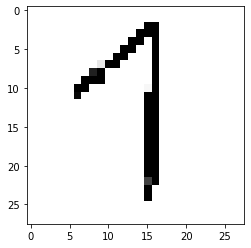

In [56]:
plt.imshow(img.convert('RGBA'))
plt.show()

Image preprocessing

In [57]:
# Converting the image to a numpy array
x = utils.img_to_array(img)
# Flattaning the array
x = x.reshape(1, 784)
# Image inversion
x = 255 - x
# Image normalization
x /= 255

Executing image recognition

In [58]:
prediction = model.predict(x)

1/1 [==============================] - 0s 17ms/step


The results of recognition

In [59]:
prediction

array([[1.0459830e-05, 8.7190253e-01, 1.9015942e-02, 1.7912898e-03,
        1.0072061e-05, 1.7779254e-03, 1.0261624e-03, 9.9829800e-02,
        1.2515867e-03, 3.3842071e-03]], dtype=float32)

In [60]:
print(np.argmax(prediction))

1
